In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import scipy.stats as stats

from sklearn import preprocessing


import warnings 
warnings.filterwarnings(action= 'ignore')

#### City of San Diego - Data SD
* Dataset name: Monitoring of Indicator Bacteria in Drinking Water
* URL: https://data.sandiego.gov/datasets/monitoring-of-indicator-bacteria-in-drinking-water/

In [2]:
# All Drinking Water Tests(Bacteria)
df = pd.read_csv('https://seshat.datasd.org/water_testing/indicator_bacteria_tests_datasd_v1.csv')
df.shape

(84814, 9)

In [3]:
# Information about observations in data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84814 entries, 0 to 84813
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FR_NUM        84814 non-null  int64  
 1   date_sampled  84814 non-null  object 
 2   source        84814 non-null  object 
 3   sample_id     84814 non-null  object 
 4   t_coliform    84803 non-null  object 
 5   cl2_total     84814 non-null  float64
 6   e_coli        84814 non-null  object 
 7   temperature   84814 non-null  float64
 8   ph            84814 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 5.8+ MB


In [4]:
# total observations with missing information
nulls_df = df.isnull().sum().to_frame().reset_index()
nulls_df.columns=['Field', 'TotalNulls']

nulls_df.query("TotalNulls != 0")

,Field,TotalNulls
4,t_coliform,11


In [5]:
# drop observations missing data and resulting shape
print('Original shape:                  ', df.shape)

df.dropna(inplace=True)
print('Shape after dropping null values:', df.shape)

Original shape:                   (84814, 9)
Shape after dropping null values: (84803, 9)


In [6]:
# final check for missing information
for n in (set(df.isnull().sum())):
    if n == 0:
        print('There is no more missing information')
    else:
        print('There is still missing information')

There is no more missing information


In [7]:
# Data Dictionary provided by source
dict_df = pd.read_csv('https://seshat.datasd.org/water_testing/indicator_bacteria_tests_dictionary_datasd.csv').fillna('')
dict_df

,Field,Description,Possible values
0,sample_date,Date sample was taken,
1,site_ID,Unique identifier for the sample site,
2,temp_celsius,Temperature in Celsius,
3,chlorine,Chlorine in mg/l or ppm,
4,pH,pH of water sample,0-14
5,coliform,Presence of Coliform indicator bacteria,"A-Absent, P-Present"
6,E.coli,Presence of E.coli indicator bacteria,"A-Absent, P-Present"


In [8]:
# Value counts for t_coliform, to determine how to treat missing values
# the value '<' is being used, as it is included in data set, and being applied to missing values as well.
# According to data dictionary, only values A and P are valid
print(df.t_coliform.fillna("blank").value_counts())

# Values A and P are valid according to dictionary, "missing" and "<" values will be removed
# Update 't_coliform' with "<" so that it is easier to delete in next step
df['t_coliform'] = df.t_coliform.fillna("<")

# Since missing values and "<" are not in data dictionary; delete rows
df = df.query("t_coliform != '<'")
print("\n","df shape after dropping t_coliform invalid rows:")
print(df.shape)

# Missing values re-check
print("\n")
print(df.t_coliform.fillna("<").value_counts())

A    84569
P      127
<      107
Name: t_coliform, dtype: int64

 df shape after dropping t_coliform invalid rows:
(84696, 9)


A    84569
P      127
Name: t_coliform, dtype: int64


In [9]:
# Data conversion
df['date_sampled'] =  pd.to_datetime(df.date_sampled)

In [10]:
print('''A value_counts for sample_id shows that there 
are multiple rows per sample_id:''')
df.sample_id.value_counts().head()

A value_counts for sample_id shows that there 
are multiple rows per sample_id:


W1329482    16
W1297079    16
W1578465    16
W1368076    16
W1352049    16
Name: sample_id, dtype: int64

In [11]:
# load sample_id value counts into dictionary
sample_id_dict = dict(df.sample_id.value_counts())

# identify sample_id values with multiple rows, and place their value into a list
sample_id_list = []

for v, k in sample_id_dict.items():
    """ Only return sample_id values that are represented in multiple rows"""
    if k > 1:
        sample_id_list.append(v)

In [13]:
for si in (pd.DataFrame(sample_id_list)[0].sample(1)):
    sample_id_var = si

print('''Querying the sample_id values identified to have multiple rows, shows that FR_NUM, date_sampled, source, 
sample_id, t_coliform, and e_coli are the same values for these multiple rows; however, 
cl2_total, temperature, and ph have similar values but not the same.''')

df.query("sample_id == @sample_id_var")

Querying the sample_id values identified to have multiple rows, shows that FR_NUM, date_sampled, source, 
sample_id, t_coliform, and e_coli are the same values for these multiple rows; however, 
cl2_total, temperature, and ph have similar values but not the same.


,FR_NUM,date_sampled,source,sample_id,t_coliform,cl2_total,e_coli,temperature,ph
64327,373247,2021-11-16,201 SYS,W1463063,A,2.30,A,21.4,7.95
64328,373247,2021-11-16,201 SYS,W1463063,A,2.30,A,21.4,7.96
64329,373247,2021-11-16,201 SYS,W1463063,A,2.30,A,21.3,7.95
64330,373247,2021-11-16,201 SYS,W1463063,A,2.30,A,21.3,7.96
64331,373247,2021-11-16,201 SYS,W1463063,A,2.30,A,21.4,7.95
64332,373247,2021-11-16,201 SYS,W1463063,A,2.30,A,21.4,7.96
64333,373247,2021-11-16,201 SYS,W1463063,A,2.30,A,21.3,7.95
64334,373247,2021-11-16,201 SYS,W1463063,A,2.30,A,21.3,7.96
64335,373247,2021-11-16,201 SYS,W1463063,A,2.37,A,21.4,7.95
64336,373247,2021-11-16,201 SYS,W1463063,A,2.37,A,21.4,7.96


In [14]:
# Create dataframe from value_counts to identify columns that can be updated, as they appear to be duplicates
df2 = df[['FR_NUM', 'date_sampled', 'source', 'sample_id']].value_counts().to_frame(name='Counts')

df2 = df2.reset_index() # places "Counts" into the header row with all other columns

# Only keep columns with Counts greater than 1
df2 = df2.query("Counts > 1")

# Merge values from original dataframe, to get averages for these rows requiring averages for duplicate rows
df2 = df2.merge(df, left_on=('FR_NUM', 'date_sampled', 'source', 'sample_id'), right_on=('FR_NUM', 'date_sampled', 'source', 'sample_id'), how="inner")

In [15]:
# Itirate through sample_id values with multiply rows to get averages from their means for:
# cl2_total, temperature, and ph

df2_means = []

for si in (set(sample_id_list)):

    df2_means.append({'sample_id': si,
                      'cl2_total_mean': df.query("sample_id == @si").cl2_total.mean(),
                      'temperature_mean': df.query("sample_id == @si").temperature.mean(),
                      'ph_mean': df.query("sample_id == @si").ph.mean()})

In [16]:
# Merge average values into original dataframe
# The use of "left" join in the merge statement above, leaves non-duplicate values empty
# ensuring no loss of data
df = df.merge(pd.DataFrame(df2_means), left_on=('sample_id'), right_on=('sample_id'), how="left")

In [17]:
# Make updates to duplicate sample_id respective features with their means
# in the fillna statements below:
df['cl2_total'] = np.where(df.cl2_total_mean.fillna("") != "", df.cl2_total_mean, df.cl2_total)
df['temperature'] = np.where(df.temperature_mean.fillna("") != "", df.temperature_mean, df.temperature)
df['ph'] = np.where(df.ph_mean.fillna("") != "", df.ph_mean, df.ph)

In [18]:
# With all variations gone, we can now drop duplicates.
df.drop_duplicates(inplace=True)
print('shape after dropping duplicates:')
print(df.shape)

shape after dropping duplicates:
(61857, 12)


In [19]:
print('''Remaining unique rows for each sample_id:''')
for u in (set(pd.DataFrame(set(df.sample_id)).value_counts().values)):
    print(u)

Remaining unique rows for each sample_id:
1


In [20]:
# Review of sample_id referenced, to confirm single row returned with mean values
df.query("sample_id == @sample_id_var")

,FR_NUM,date_sampled,source,sample_id,t_coliform,cl2_total,e_coli,temperature,ph,cl2_total_mean,temperature_mean,ph_mean
64218,373247,2021-11-16,201 SYS,W1463063,A,2.335,A,21.35,7.955,2.335,21.35,7.955


In [21]:
# Drop unnecessary columns for remainder of the process - used in previous steps
df = df.drop(['cl2_total_mean', 'temperature_mean', 'ph_mean'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61857 entries, 0 to 84695
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FR_NUM        61857 non-null  int64         
 1   date_sampled  61857 non-null  datetime64[ns]
 2   source        61857 non-null  object        
 3   sample_id     61857 non-null  object        
 4   t_coliform    61857 non-null  object        
 5   cl2_total     61857 non-null  float64       
 6   e_coli        61857 non-null  object        
 7   temperature   61857 non-null  float64       
 8   ph            61857 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 4.7+ MB


In [22]:
# Based on the results from the above, it appears the data is ordered by date_sampled

# To ensure that all rows are following this pattern, the next step will 
# sort rows by date_sampled, source, and sample_id to get a chronological, to prepare for Time Series analysis

df.sort_values(['date_sampled', 'FR_NUM'], ascending=[True, True], inplace=True)

In [23]:
# reset index, drop original index
df.reset_index(drop=True, inplace=True)

#### Outliers


In [24]:
# Outlier Analysis

# this function idea is from the Udemy "Feature Engineering for Machine Learning" course
def diagnostic_plots(df, variable, conversion):
    # function takes a dataframe and
    # the variable of interest

    # variable conversion
    if conversion == 'l':
        conv_var = np.log(df[variable])
        print('conversion: log')
    elif conversion == 's':
        conv_var = np.sqrt(df[variable])
        print('conversion: sqrt')
    elif conversion == 'c':
        conv_var = np.cbrt(df[variable])
        print('conversion: cbrt')
    elif conversion == 'a':
        conv_var = np.abs(df[variable])
        print('conversion: abs')
    else:
        conv_var = df[variable]
        print('conversion: none')    

    # define plot figure size
    plt.figure(figsize=(14,3))

    # histogram
    plt.subplot(1,3,1)
    sns.distplot(conv_var, bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(conv_var, dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1,3,3)
    sns.boxplot(y=conv_var)
    plt.title('Boxplot')

    plt.show()

In [25]:
# Function to find outliers by their respective high and low boundary, Gaussian distribution
# Got this idea from same Udemy video mentioned above
def find_normal_boundaries(df, variable, distance):

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return lower_boundary, upper_boundary

In [50]:
# dictionary with conversion options
conversion_options = {'l': 'log', 's': 'sqrt', 'c': 'cbrt', 'a': 'abs'}

# print conversion options, key and values
for kv in (conversion_options.items()):
    print(kv)

('l', 'log')
('s', 'sqrt')
('c', 'cbrt')
('a', 'abs')


conversion: abs


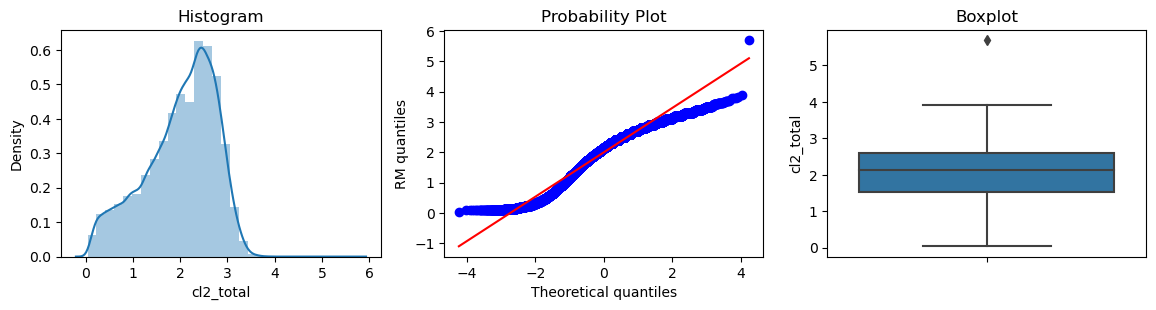

conversion: cbrt


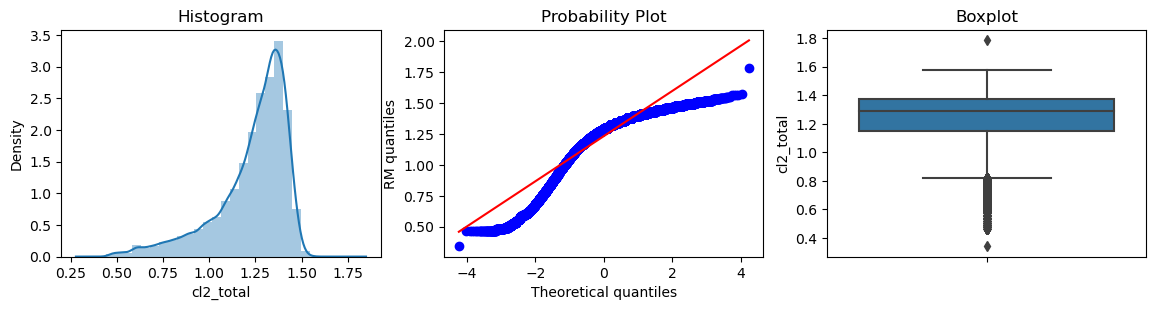

conversion: sqrt


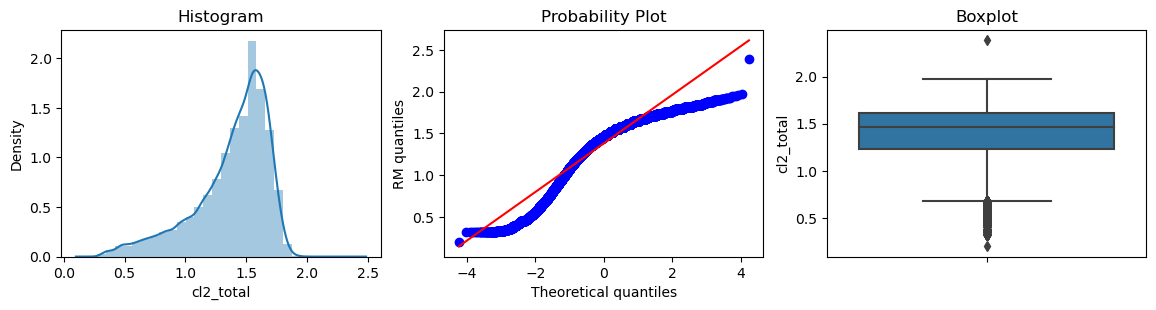

conversion: log


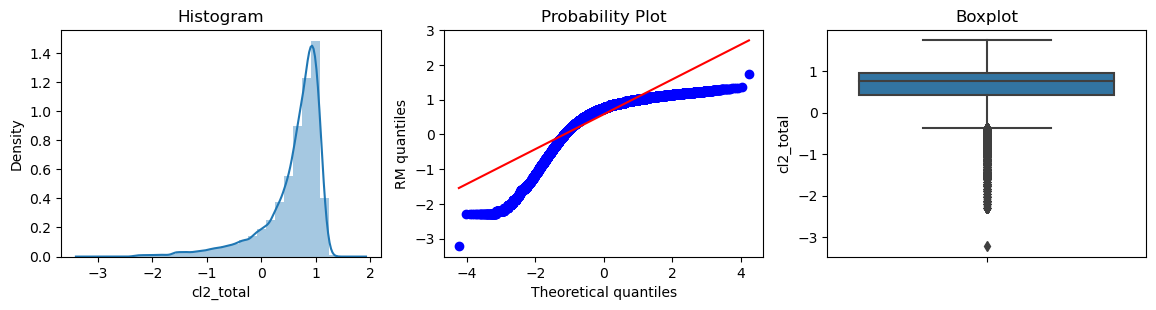

In [27]:
for conversion_type in (set(conversion_options.keys())):
    diagnostic_plots(df, 'cl2_total', conversion_type)

In [55]:
print('''The absolute value of cl2_total will be used as it has the best spread.
To address the outlier on the upper range, it will go through transformation in the next step''')

The absolute value of cl2_total will be used as it has the best spread.
To address the outlier on the upper range, it will go through transformation in the next step


In [51]:
# find lower and upper boundaries of 'cl2_total'
temperature_lower_limit, temperature_upper_limit = find_normal_boundaries(df, 'cl2_total', 3)

# Apply boundaries to outliers
df['cl2_total'] = np.where(df['cl2_total'] > temperature_upper_limit, temperature_upper_limit,
                     np.where(df['cl2_total'] < temperature_lower_limit, temperature_lower_limit,
                      df['cl2_total']))

conversion: abs


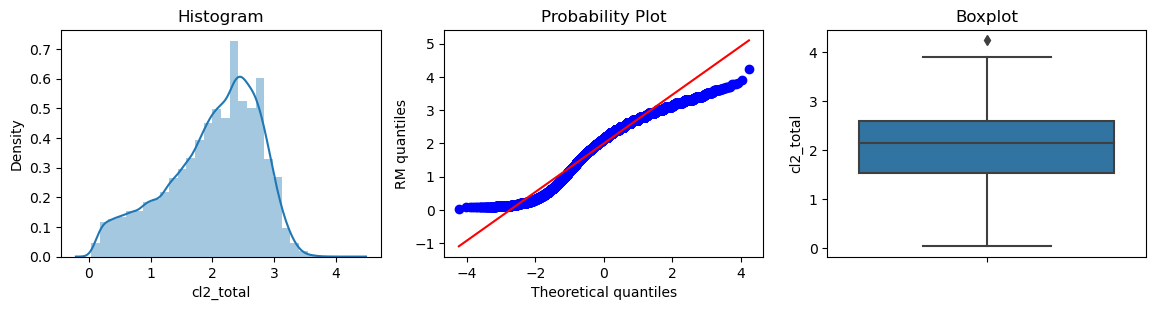

conversion: cbrt


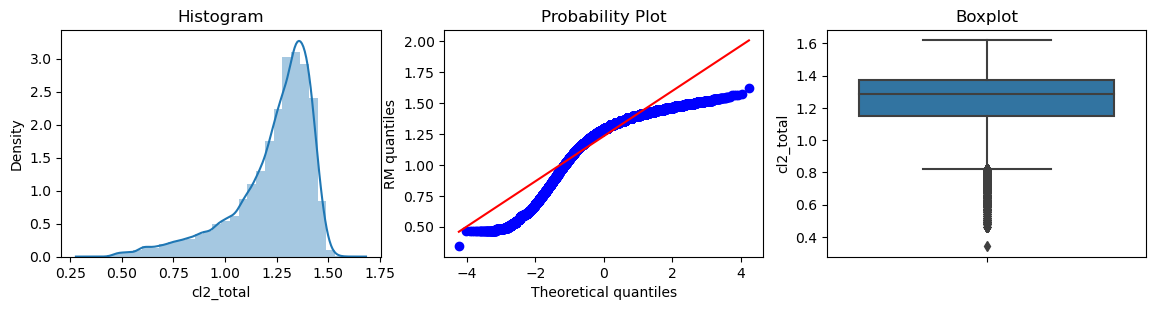

conversion: sqrt


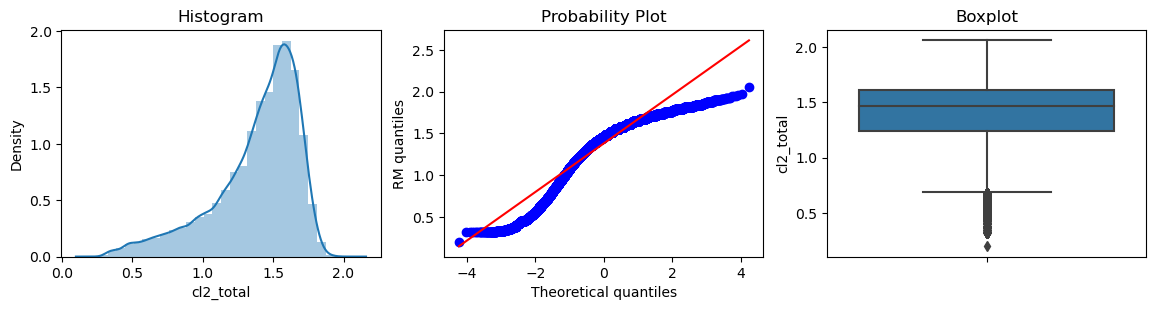

conversion: log


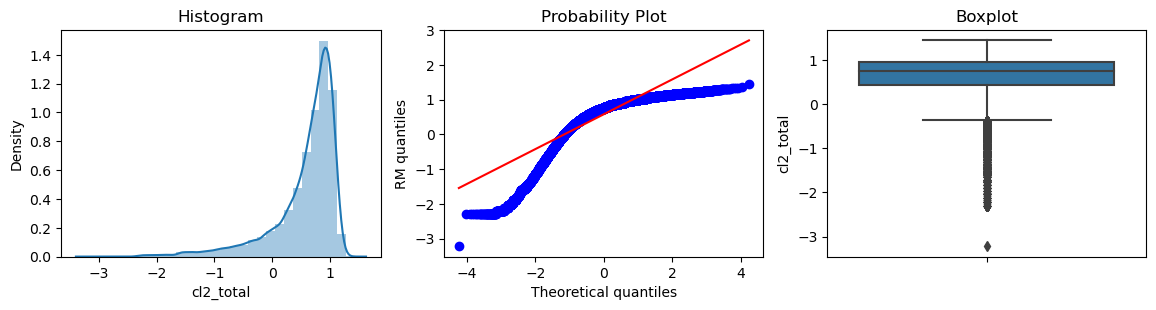

In [52]:
for conversion_type in (set(conversion_options.keys())):
    diagnostic_plots(df, 'cl2_total', conversion_type)

In [54]:
print('''After transformation, the cl2_total absolute value remains the best representation.
The outliers in the upper range were compressed, which in turn makes better use of its entire range.''')

After transformation, the cl2_total absolute value remains the best representation.
The outliers in the upper range were compressed, which in turn makes better use of its entire range.


conversion: abs


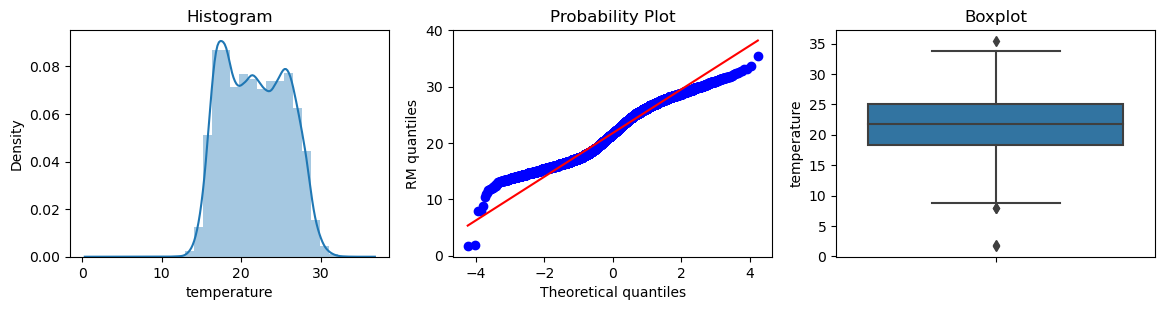

conversion: cbrt


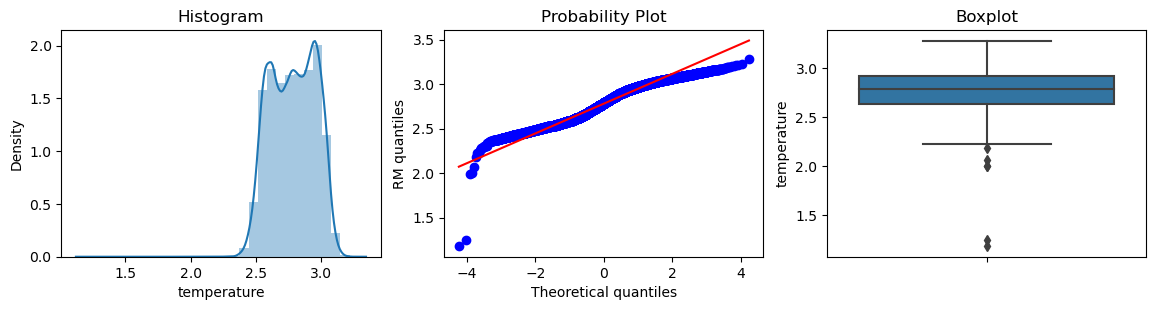

conversion: sqrt


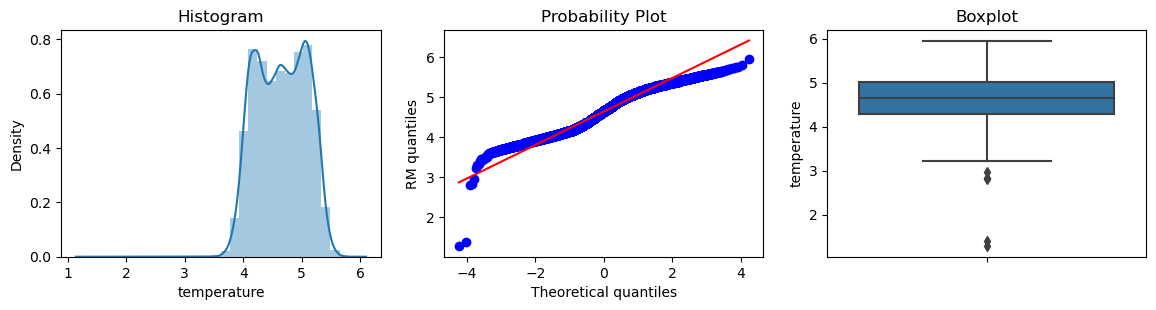

conversion: log


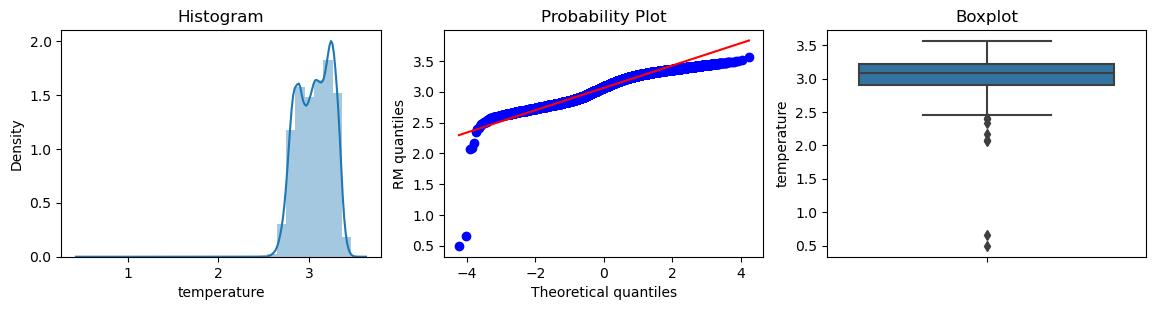

In [28]:
for conversion_type in (set(conversion_options.keys())):
    diagnostic_plots(df, 'temperature', conversion_type)

In [29]:
# find lower and upper boundaries of 'temperature'
temperature_lower_limit, temperature_upper_limit = find_normal_boundaries(df, 'temperature', 3)

# Apply boundaries to outliers
df['temperature'] = np.where(df['temperature'] > temperature_upper_limit, temperature_upper_limit,
                     np.where(df['temperature'] < temperature_lower_limit, temperature_lower_limit,
                      df['temperature']))

conversion: abs


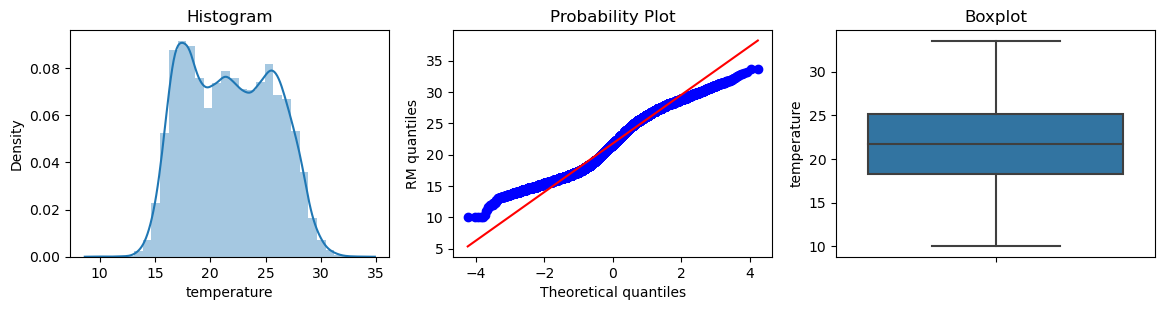

conversion: cbrt


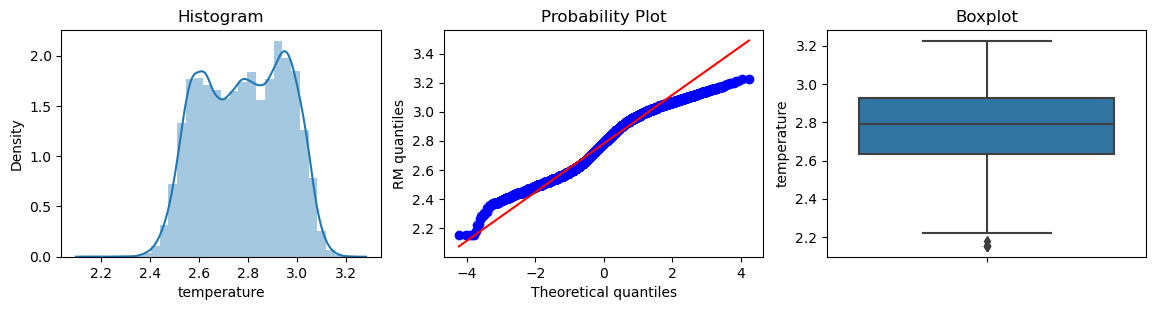

conversion: sqrt


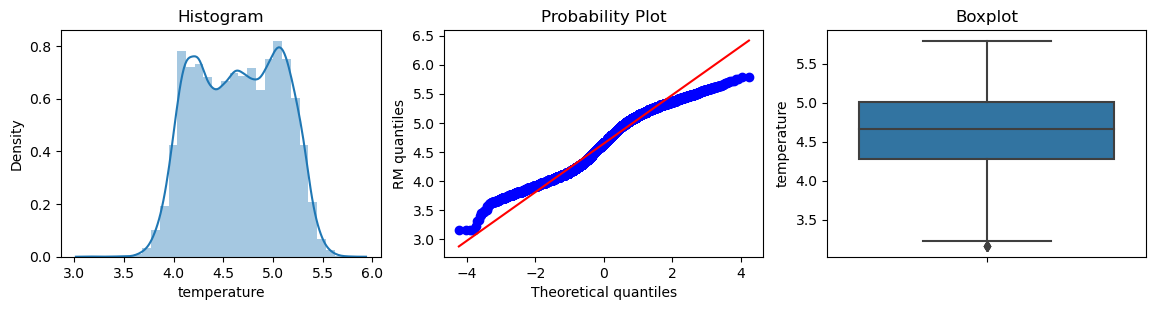

conversion: log


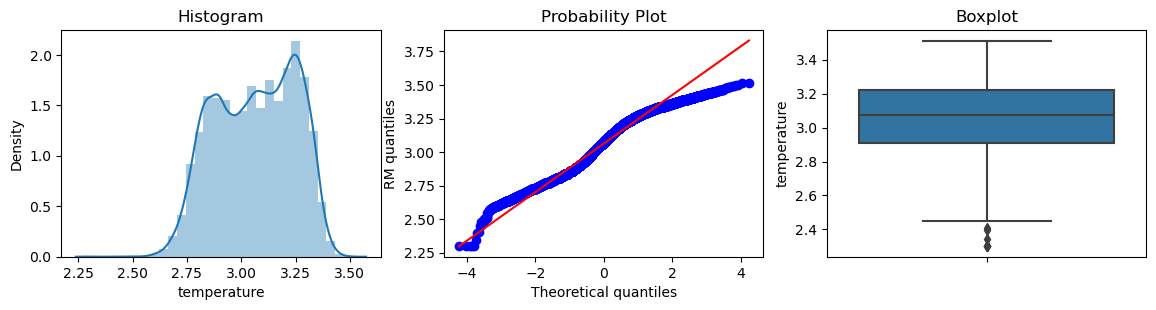

In [30]:
# Verify changes to temperature feature
for conversion_type in (set(conversion_options.keys())):
    diagnostic_plots(df, 'temperature', conversion_type)

conversion: abs


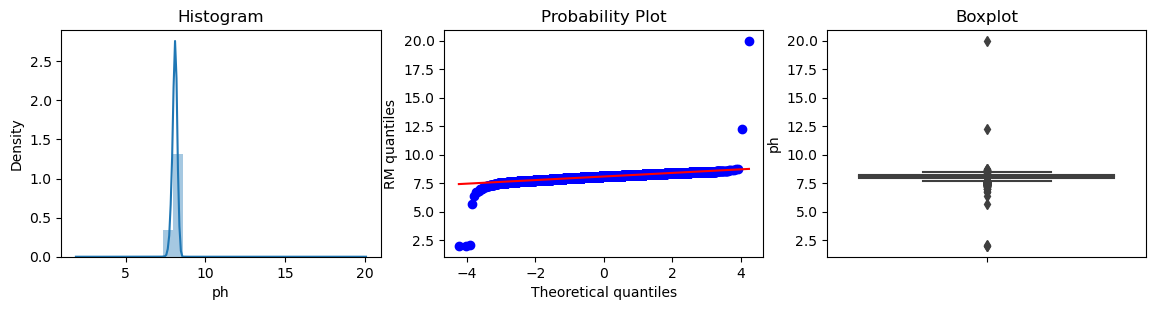

conversion: cbrt


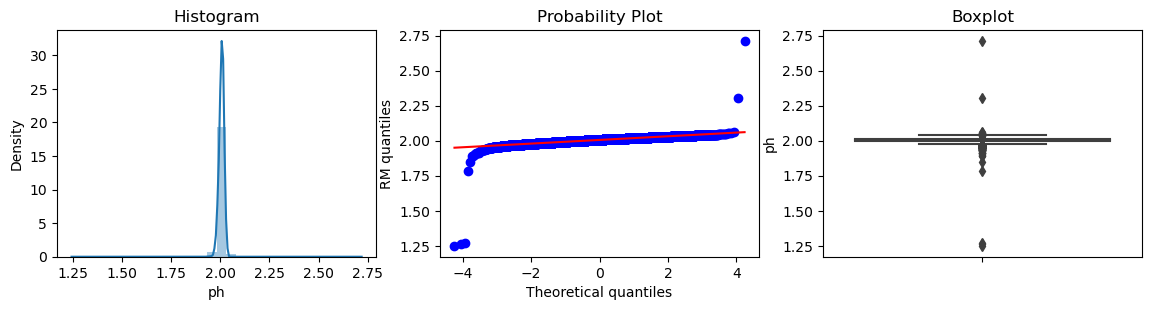

conversion: sqrt


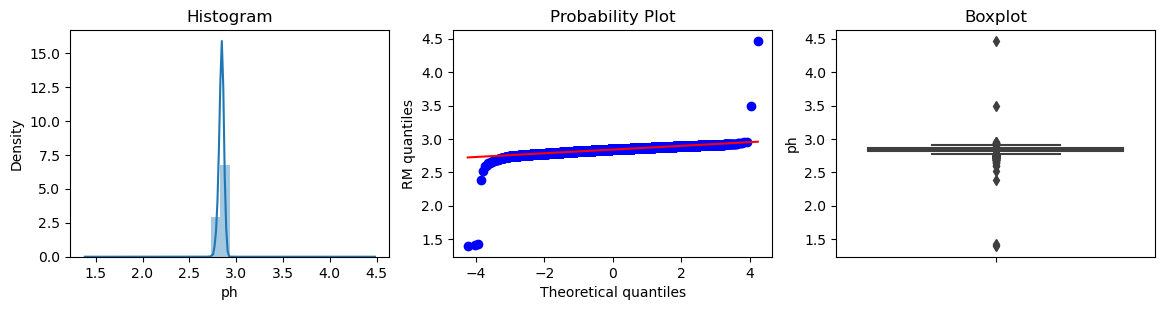

conversion: log


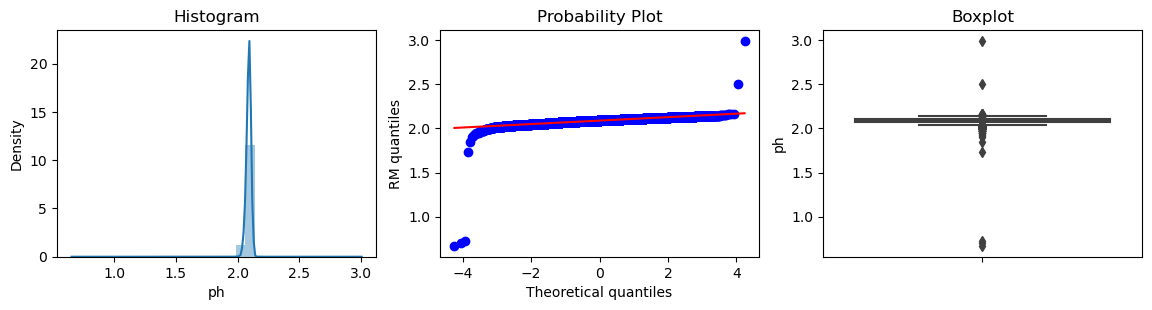

In [31]:
for conversion_type in (set(conversion_options.keys())):
    diagnostic_plots(df, 'ph', conversion_type)

In [32]:
# find lower and upper boundaries of 'ph'
ph_lower_limit, ph_upper_limit = find_normal_boundaries(df, 'ph', 3)

# Apply boundaries to outliers
df['ph'] = np.where(df['ph'] > ph_upper_limit, ph_upper_limit,
                     np.where(df['ph'] < ph_lower_limit, ph_lower_limit,
                      df['ph']))

conversion: abs


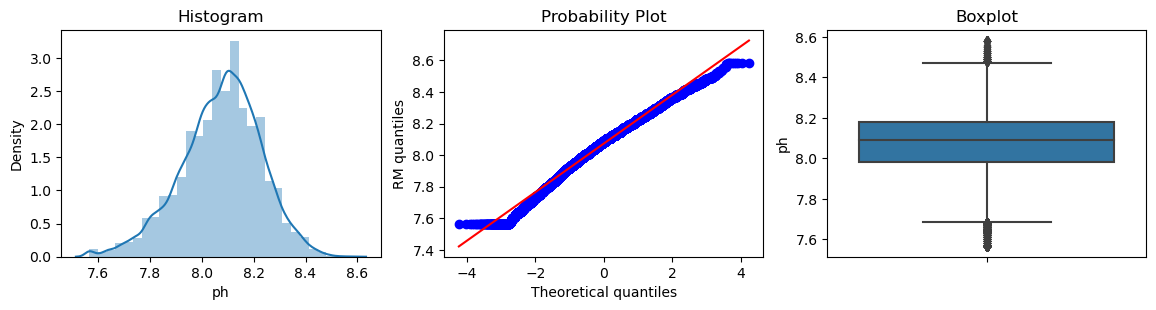

conversion: cbrt


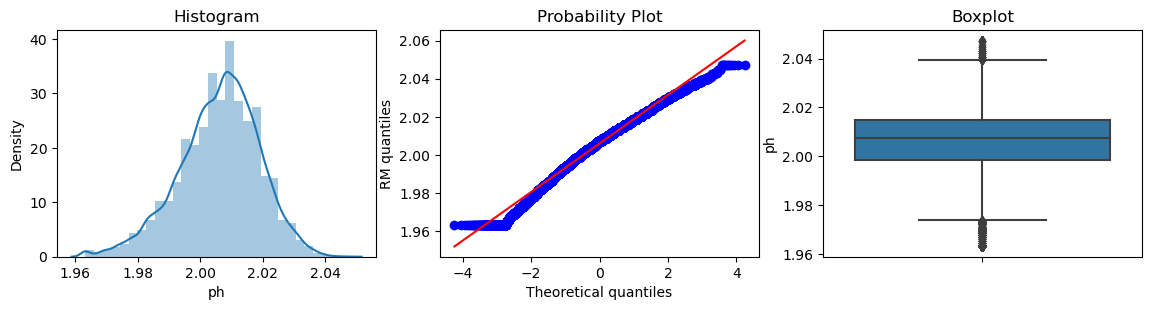

conversion: sqrt


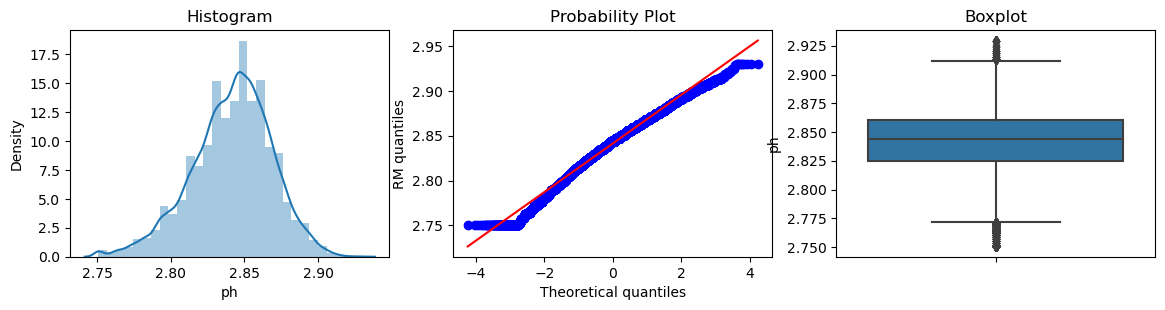

conversion: log


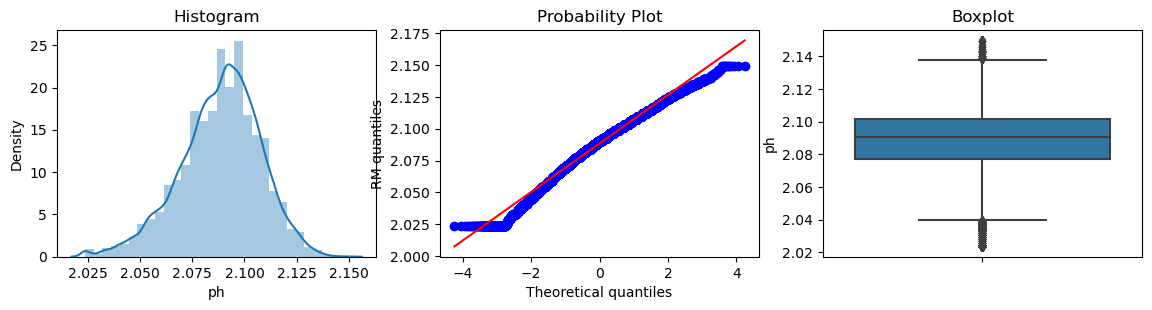

In [33]:
for conversion_type in (set(conversion_options.keys())):
    diagnostic_plots(df, 'ph', conversion_type)

#### Business purpose (from website)

* A positive result for coliform from one single test is not enough to constitute an MCL (Maximum Contaminant Level) violation. An acute violation occurs when a site that initially tested positive is repeat tested and either the initial sample or one of the repeat samples is positive for E. coli. A monthly MCL violation occurs if more than 5 percent of all routine and repeat tests are coliform positive. A positive coliform result from a single routine test may be due to sampling error or bacteria in the testing mechanism but not in the drinking water pipes.

In [132]:
print('''There are no acute violations in the dataset, as all e_coli values equal 'A' 
across all {} rows, which is 'absent' e_coli.'''.format(pd.DataFrame(df.e_coli.value_counts()).iloc[0].values[0]))

df.e_coli.value_counts()

There are no acute violations in the dataset, as all e_coli values equal 'A' 
across all 61509 rows, which is 'absent' e_coli.


A    61509
Name: e_coli, dtype: int64

In [133]:
print('''A monthly MCL violation occurs if more than 5 percent of all routine and repeat tests are coliform positive. 
We have 'P', present, values in the t_coliform feature.''',"\n")

df.t_coliform.value_counts()

A monthly MCL violation occurs if more than 5 percent of all routine and repeat tests are coliform positive. 
We have 'P', present, values in the t_coliform feature. 



A    61402
P      107
Name: t_coliform, dtype: int64

#### Feature Engineering


In [134]:
# Adding a month-year value to best identify MCL violations
df['year'] = pd.DatetimeIndex(df.date_sampled).year
df['month'] = pd.DatetimeIndex(df.date_sampled).month
df['yearMonth'] =  df.year.astype(str) + '-' + df.month.astype(str)

In [135]:
# Identify yearMonth where t_coliform was Present, 'P'
ym_df = pd.DataFrame(df.query("t_coliform == 'P'").yearMonth.unique())
ym_df.columns = ['yearMonth']

# Get all data from df for yearMonth where there was t_coliform present
ym_df = df.merge(ym_df, left_on='yearMonth', right_on='yearMonth', how='inner')

In [136]:
# Crosstab results, into dataframe
ym_df = pd.DataFrame(pd.crosstab(ym_df.yearMonth, ym_df.t_coliform)).reset_index()

# Add a Total column
ym_df['Total'] = ym_df.A + ym_df.P

# Add a t_coli percent column, representing the percentage of cases in the month, when t_coli was Present
ym_df['yearMonth_t_coli_pct'] = round(ym_df.P / ym_df.Total * 100)

In [137]:
# Add yearMonth_t_coli_pct to main dataframe
df = df.merge(ym_df[['yearMonth', 'yearMonth_t_coli_pct']], left_on='yearMonth', right_on='yearMonth', how='left')

# Update Nan values to 0.0
df['yearMonth_t_coli_pct'] = df.yearMonth_t_coli_pct.fillna(0.0)


# Convert floats to integer
df['yearMonth_t_coli_pct'] = df.yearMonth_t_coli_pct.astype(int)

In [138]:
print('''There are no t_coliform instances per Month, of more than 5% in the dataset.
When present, it has equaled as high as 1% for the respective month only.''',"\n")
df.yearMonth_t_coli_pct.value_counts()

There are no t_coliform instances per Month, of more than 5% in the dataset.
When present, it has equaled as high as 1% for the respective month only. 



0    53121
1     8388
Name: yearMonth_t_coli_pct, dtype: int64

### EDA


##### Subset

In [139]:
df_subset = df[['date_sampled', 't_coliform', 'cl2_total', 'e_coli', 'temperature', 'ph', 'yearMonth_t_coli_pct']]

df_subset

,date_sampled,t_coliform,cl2_total,e_coli,temperature,ph,yearMonth_t_coli_pct
0,2014-06-02,A,2.80,A,22.8,8.03,0
1,2014-06-02,A,2.22,A,23.6,8.00,0
2,2014-06-02,A,1.95,A,25.5,7.99,0
3,2014-06-02,A,1.78,A,24.5,7.95,0
4,2014-06-02,A,2.70,A,22.2,8.02,0
...,...,...,...,...,...,...,...
61504,2023-08-07,A,0.51,A,22.8,8.06,0
61505,2023-08-07,A,2.60,A,24.2,8.12,0
61506,2023-08-07,A,1.72,A,22.4,8.04,0
61507,2023-08-07,A,0.55,A,24.2,8.00,0


##### Get dummies

In [140]:
df_dummies = pd.get_dummies(df_subset.select_dtypes(include='object'))

# join uses index as default on join
df_subset = df_subset.join(df_dummies, how='outer')

# drop 'object' columns
df_subset.drop(columns=df_subset.select_dtypes(include='object').columns.tolist(), inplace=True)

df_subset

,date_sampled,cl2_total,temperature,ph,yearMonth_t_coli_pct,t_coliform_A,t_coliform_P,e_coli_A
0,2014-06-02,2.80,22.8,8.03,0,1,0,1
1,2014-06-02,2.22,23.6,8.00,0,1,0,1
2,2014-06-02,1.95,25.5,7.99,0,1,0,1
3,2014-06-02,1.78,24.5,7.95,0,1,0,1
4,2014-06-02,2.70,22.2,8.02,0,1,0,1
...,...,...,...,...,...,...,...,...
61504,2023-08-07,0.51,22.8,8.06,0,1,0,1
61505,2023-08-07,2.60,24.2,8.12,0,1,0,1
61506,2023-08-07,1.72,22.4,8.04,0,1,0,1
61507,2023-08-07,0.55,24.2,8.00,0,1,0,1


#### get dummies for year

In [141]:
### get dummies for year

##### Target variable imbalance

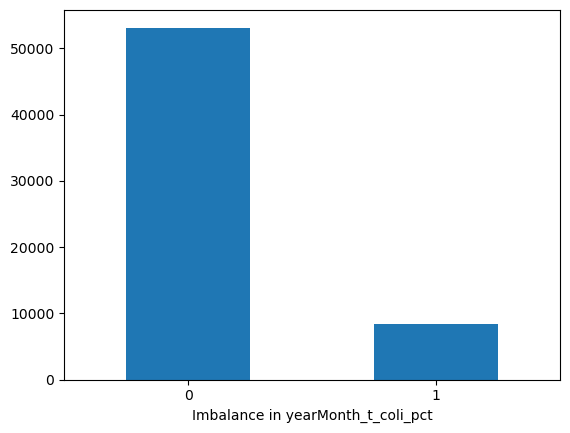

In [142]:
df_subset.yearMonth_t_coli_pct.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Imbalance in yearMonth_t_coli_pct')
plt.show()

#### Balance target

In [143]:
df_subset.yearMonth_t_coli_pct

0        0
1        0
2        0
3        0
4        0
        ..
61504    0
61505    0
61506    0
61507    0
61508    0
Name: yearMonth_t_coli_pct, Length: 61509, dtype: int32

##### Pairplot of numerical variables

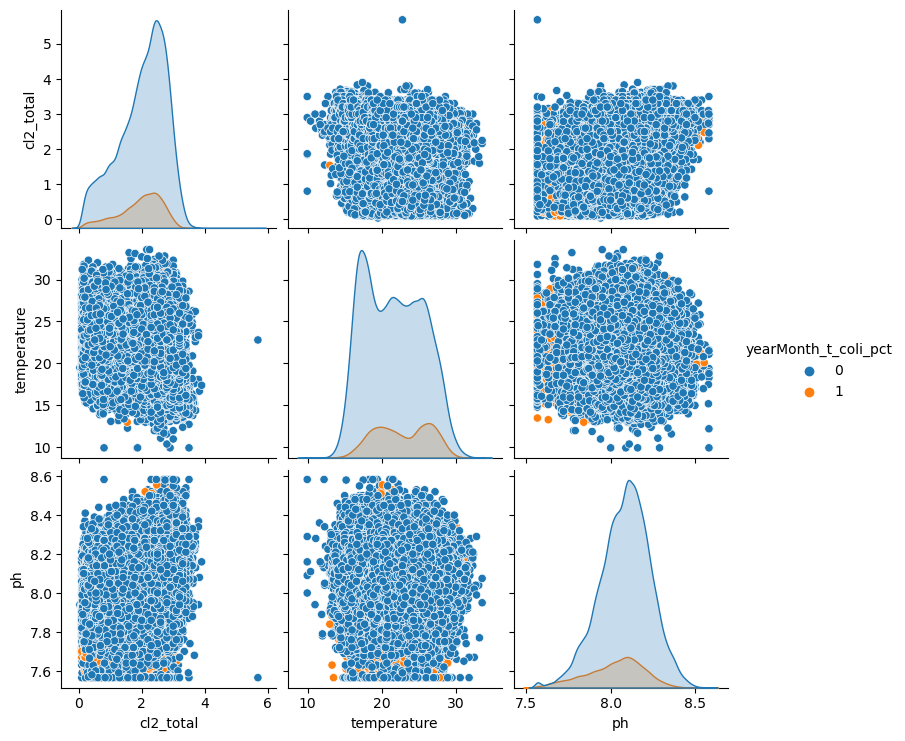

In [144]:
sns.pairplot(df_subset.select_dtypes(include=['float64', 'int64', 'int32']), hue='yearMonth_t_coli_pct')
plt.show()

### Create a Target classifier, representing a source that had t_coliform present at any point in the dataset.
### source_t_coliform_historically

In [145]:
# Identify 'source' which has had t_coliform in the past
source_df = pd.DataFrame(df.query("t_coliform == 'P'").source.unique())
source_df.columns = ['source']
source_df['source_t_coliform_historically'] = 1

In [146]:
# Merge source_df into main dataframe
df = df.merge(source_df, left_on='source', right_on='source', how='left')

# Convert missing values to 0
df['source_t_coliform_historically'] = df.source_t_coliform_historically.fillna(0)

# Convert to int
df['source_t_coliform_historically'] = df.source_t_coliform_historically.astype(int)

In [147]:
# initiate sklearn LabelEncoder
le = preprocessing.LabelEncoder()

# LabelEncoder 'source' feature
le.fit(df['source'])
df['source_le'] =  le.transform(df['source'])

# LabelEncoder 'yearMonth' feature
le.fit(df['yearMonth'])
df['yearMonth_le'] =  le.transform(df['yearMonth'])

In [148]:
# Binary values for t_coliform
df['t_coliform_bin'] = np.where(df.t_coliform == 'A', 0, 1)

## Proposed target variable

<AxesSubplot:>

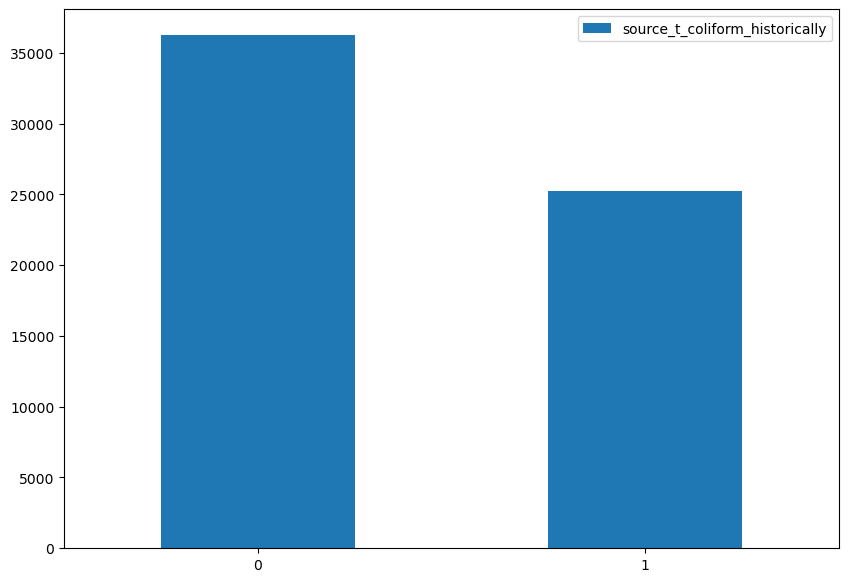

In [149]:
# More than half of the "sources" have had t_coliform present at some point
pd.DataFrame(df.source_t_coliform_historically.value_counts()).plot.bar(rot=0, stacked=True, figsize=(10,7))

This graph shows ticks for the year when a label encoded source, had t_coliform present,
between the years 2015 through 2018. This is in effort to try and recognize patterns of recurring 
t_coliform at specific sources during this stretch of time. 



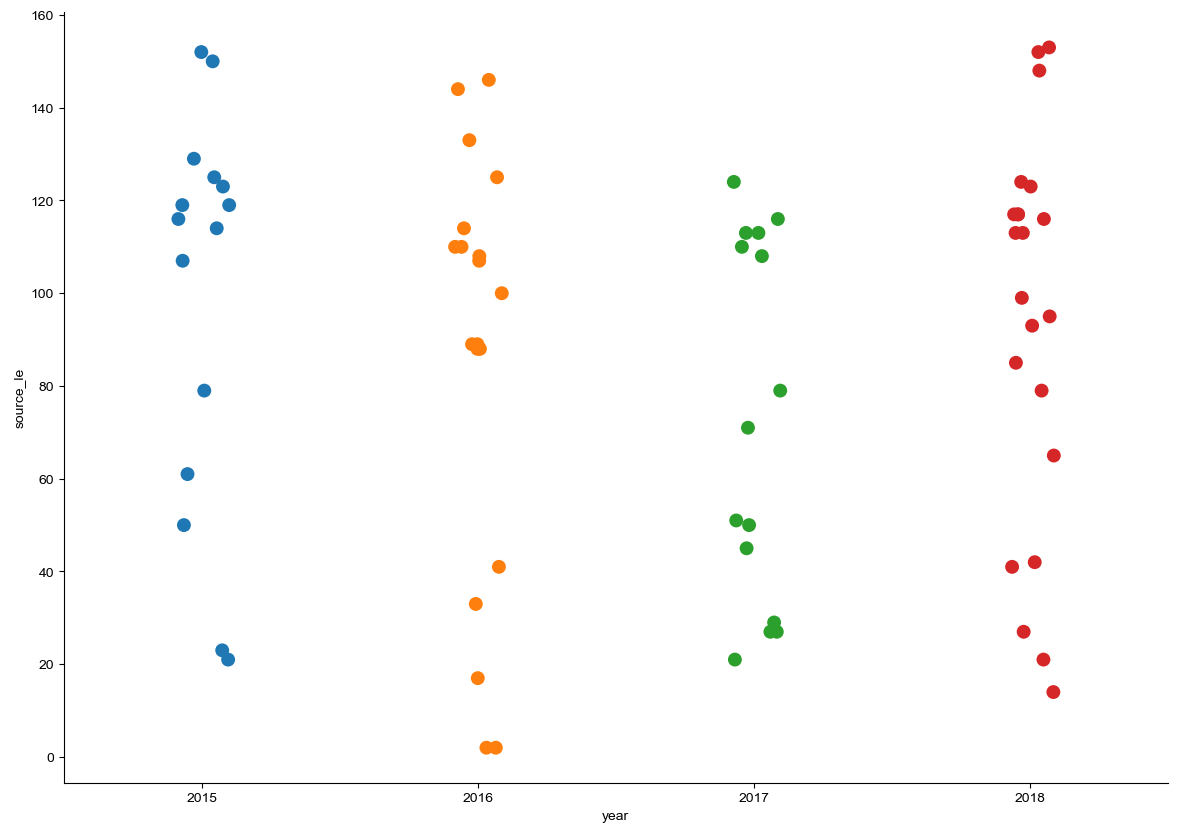

In [150]:
print('''This graph shows ticks for the year when a label encoded source, had t_coliform present,
between the years 2015 through 2018. This is in effort to try and recognize patterns of recurring 
t_coliform at specific sources during this stretch of time.''',"\n")

sns.catplot(data=df.query("t_coliform_bin == 1 and year <= 2018 and year >= 2015"), x='year', y='source_le', s=10, height=8.27, aspect=11.7/8.27)
sns.set_style("ticks",{'axes.grid' : True})

<AxesSubplot:>

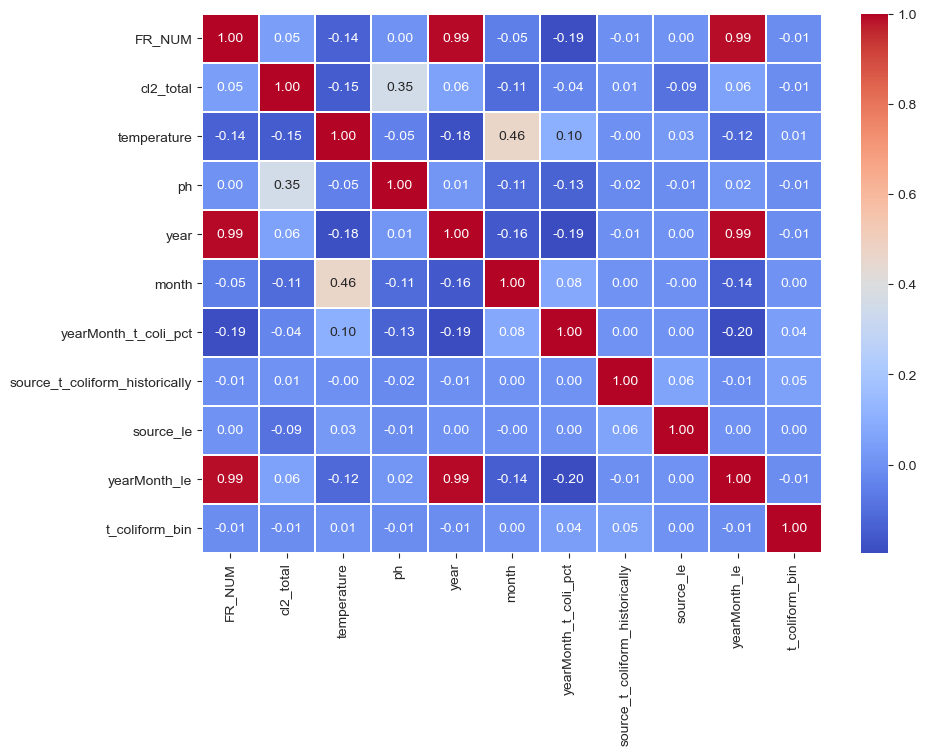

In [151]:
# Correlation Matrix
pearsoncorr = df.corr(method='pearson')

plt.figure(figsize= (10, 7))

sns.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='coolwarm',
            fmt=".2f",
            annot=True,
            linewidth=0.25)